## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [2111]:
#import necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2112]:
#read input dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2113]:
#check shape of dataframe
df.shape

(1460, 81)

In [2114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2115]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2116]:
#check missing values
null_df = pd.DataFrame(round(100*df.isnull().sum()/df.shape[0],2).sort_values(ascending=False), columns=['Null %'])
null_df.index.name = 'Features'
null_df.head(20)

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [2117]:
#lets drop PoolQC, MiscFeature, Alley, Fence and FireplaceQu columns as they contain more null values
#moreover we will drop YearRemodAdd and GarageYrBlt feature as well as they don't add any value
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','YearRemodAdd','GarageYrBlt'], axis=1, inplace=True)

In [2118]:
#lets check distribution of values in 'Electrical' column
df['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [2119]:
#Electrical categorical feature is highly skewed,hence we will drop it
df.drop(['Electrical'], axis=1, inplace=True)

In [2120]:
#lets check distribution of values in 'MasVnrType' column
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [2121]:
#MasVnrType  feature contains 0.55 percent missing values and it indicates Masonry veneer type. Here lets replace missing values with None
df['MasVnrType'].fillna('None', inplace=True)

In [2122]:
#lets check distribution of values in 'MasVnrArea' column
df['MasVnrArea'].value_counts(normalize=True)

0.0       0.592975
180.0     0.005510
72.0      0.005510
108.0     0.005510
120.0     0.004821
16.0      0.004821
200.0     0.004132
340.0     0.004132
106.0     0.004132
80.0      0.004132
132.0     0.003444
320.0     0.003444
360.0     0.003444
84.0      0.003444
170.0     0.003444
220.0     0.002755
336.0     0.002755
183.0     0.002755
252.0     0.002755
196.0     0.002755
300.0     0.002755
268.0     0.002755
40.0      0.002755
168.0     0.002755
100.0     0.002755
270.0     0.002755
210.0     0.002755
76.0      0.002755
288.0     0.002755
216.0     0.002755
160.0     0.002755
178.0     0.002755
246.0     0.002755
456.0     0.002755
74.0      0.002066
70.0      0.002066
50.0      0.002066
44.0      0.002066
272.0     0.002066
226.0     0.002066
104.0     0.002066
116.0     0.002066
90.0      0.002066
145.0     0.002066
148.0     0.002066
42.0      0.002066
110.0     0.002066
128.0     0.002066
85.0      0.002066
136.0     0.002066
420.0     0.002066
186.0     0.002066
256.0     0.

In [2123]:
#MasVnrArea  feature contains 0.55 percent missing values and it indicates Masonry veneer area in square feet. Here lets replace missing values with median
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [2124]:
#lets check distribution of values in 'BsmtFinType1' column
df['BsmtFinType1'].value_counts(normalize=True)

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

In [2125]:
#BsmtFinType1  feature contains 2.53 percent missing values and it indicates rating of basement finished area. Here lets replace missing values with NA
df['BsmtFinType1'].fillna('NA', inplace=True)

In [2126]:
#lets check distribution of values in 'BsmtCond' column
df['BsmtCond'].value_counts(normalize=True)

TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64

In [2127]:
#BsmtCond feature has highly skewed distribution, hence we will delete it
df.drop(['BsmtCond'], axis=1, inplace=True)

In [2128]:
#lets check distribution of values in 'BsmtQual' column
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [2129]:
#BsmtQual feature contains 2.60 percent missing values and it indicates walkout or garden level walls. Here lets replace missing values with NA
df['BsmtQual'].fillna('NA', inplace=True)

In [2130]:
#lets check distribution of values in 'BsmtExposure' column
df['BsmtExposure'].value_counts(normalize=True)

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

In [2131]:
#BsmtExposure feature contains 2.60 percent missing values and it indicates walkout or garden level walls. Here lets replace missing values with NA
df['BsmtExposure'].fillna('NA', inplace=True)

In [2132]:
#lets check distribution of values in 'BsmtFinType2' column
df['BsmtFinType2'].value_counts(normalize=True)

Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64

In [2133]:
#BsmtFinType2 feature has highly skewed distribution, hence we will drop it
df.drop(['BsmtFinType2'], axis=1, inplace=True)

In [2134]:
#lets check distribution of values in 'GarageQual' column
df['GarageQual'].value_counts(normalize=True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: GarageQual, dtype: float64

In [2135]:
#GarageQual feature has highly skewed distribution
df.drop(['GarageQual'], axis=1, inplace=True)

In [2136]:
#lets check distribution of values in 'GarageFinish' column
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [2137]:
#GarageFinish feature contains 5.55 percent missing values and it indicates interior finish of the garage. Here lets replace missing values with NA
df['GarageFinish'].fillna('NA', inplace=True)

In [2138]:
#lets check distribution of values in 'GarageType' column
df['GarageType'].value_counts(normalize=True)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

In [2139]:
#GarageType feature contains 5.55 percent missing values and it indicates garage location. Here lets replace missing values with NA
df['GarageType'].fillna('NA', inplace=True)

In [2140]:
#lets check distribution of values in 'GarageCond' column
df['GarageCond'].value_counts(normalize=True)

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64

In [2141]:
#GarageCond feature has highly skewed distribution, hence we will delete it
df.drop(['GarageCond'], axis=1, inplace=True)

In [2142]:
#LotFrontage feature contains 17.74 percent missing values and it indicates Linear feet of street connected to property. Hence, we will replace missing values with median

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [2143]:
null_df = pd.DataFrame(round(100*df.isnull().sum()/df.shape[0],2).sort_values(ascending=False), columns=['Null %'])
null_df.index.name = 'Features'
null_df.head(5) #there are no missing values in the dataframe now

,Null %
Features,
Id,0.0
FullBath,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0


In [2144]:
df.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000

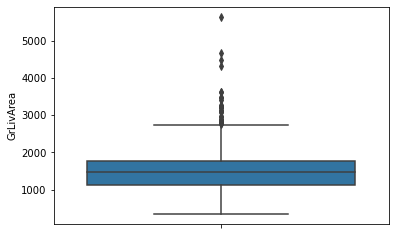

In [2145]:
#outlier treatment for GrLivArea column
sns.boxplot(y=df['GrLivArea'])
plt.show()

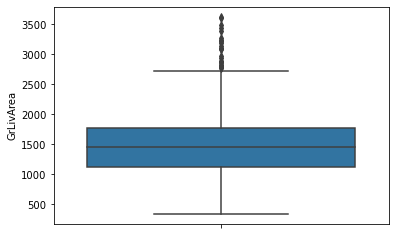

In [2146]:
q1 = df['GrLivArea'].quantile(0.1)
q3 = df['GrLivArea'].quantile(0.9)
IQR = q3 - q1
df = df[(df['GrLivArea'] >= q1 - 1.5*IQR) & (df['GrLivArea'] <= q3 + 1.5*IQR)]
sns.boxplot(y=df['GrLivArea'])
plt.show()

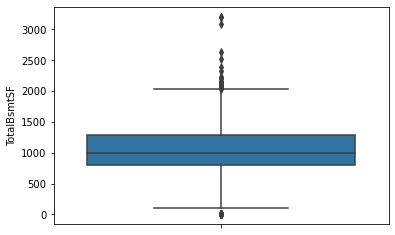

In [2147]:
#outlier treatment for TotalBsmtSF column
sns.boxplot(y=df['TotalBsmtSF'])
plt.show()

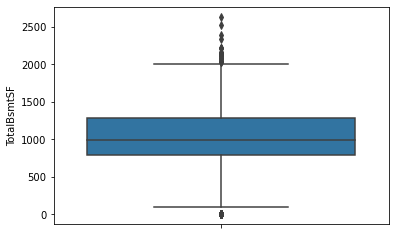

In [2148]:
q1 = df['TotalBsmtSF'].quantile(0.1)
q3 = df['TotalBsmtSF'].quantile(0.9)
IQR = q3 - q1
df = df[(df['TotalBsmtSF'] >= q1 - 1.5*IQR) & (df['TotalBsmtSF'] <= q3 + 1.5*IQR)]
sns.boxplot(y=df['TotalBsmtSF'])
plt.show()

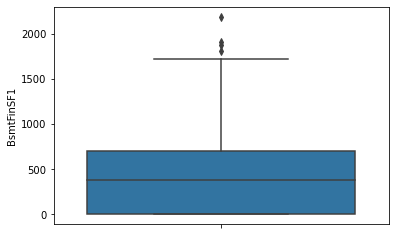

In [2149]:
#outlier treatment for BsmtFinSF1 column
sns.boxplot(y=df['BsmtFinSF1'])
plt.show()

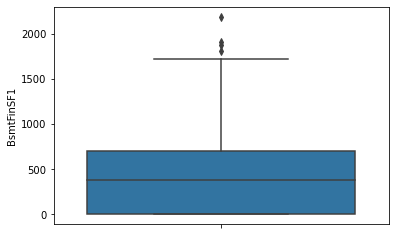

In [2150]:
q1 = df['BsmtFinSF1'].quantile(0.1)
q3 = df['BsmtFinSF1'].quantile(0.9)
IQR = q3 - q1
df = df[(df['BsmtFinSF1'] >= q1 - 1.5*IQR) & (df['BsmtFinSF1'] <= q3 + 1.5*IQR)]
sns.boxplot(y=df['BsmtFinSF1'])
plt.show()

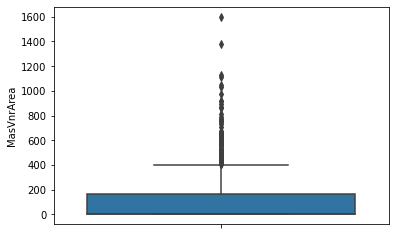

In [2151]:
#outlier treatment for MasVnrArea column
sns.boxplot(y=df['MasVnrArea'])
plt.show()

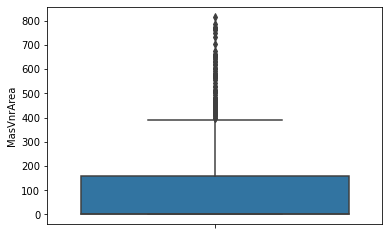

In [2152]:
q1 = df['MasVnrArea'].quantile(0.1)
q3 = df['MasVnrArea'].quantile(0.9)
IQR = q3 - q1
df = df[(df['MasVnrArea'] >= q1 - 1.5*IQR) & (df['MasVnrArea'] <= q3 + 1.5*IQR)]
sns.boxplot(y=df['MasVnrArea'])
plt.show()

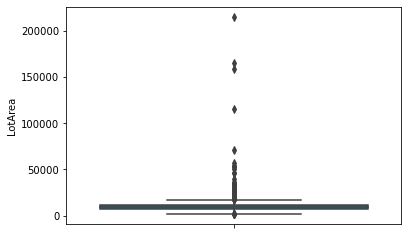

In [2153]:
#outlier treatment for LotArea column
sns.boxplot(y=df['LotArea'])
plt.show()

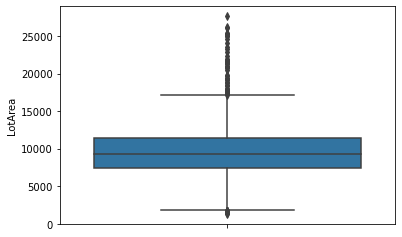

In [2154]:
q1 = df['LotArea'].quantile(0.1)
q3 = df['LotArea'].quantile(0.9)
IQR = q3 - q1
df = df[(df['LotArea'] >= q1 - 1.5*IQR) & (df['LotArea'] <= q3 + 1.5*IQR)]
sns.boxplot(y=df['LotArea'])
plt.show()

In [2155]:
#As distribution of values in LowQualFinSF column is very skewed, hence this column can be dropped
df['LowQualFinSF'].value_counts(normalize=True)

0      0.981690
80     0.002113
360    0.001408
205    0.000704
479    0.000704
397    0.000704
514    0.000704
120    0.000704
481    0.000704
232    0.000704
53     0.000704
515    0.000704
156    0.000704
473    0.000704
420    0.000704
390    0.000704
371    0.000704
392    0.000704
144    0.000704
572    0.000704
528    0.000704
234    0.000704
513    0.000704
384    0.000704
Name: LowQualFinSF, dtype: float64

In [2156]:
df.drop(['LowQualFinSF'], axis=1, inplace=True)

In [2157]:
#As distribution of values in MiscVal column is very skewed, hence this column needs to be dropped
df['MiscVal'].value_counts(normalize=True)

0        0.964789
400      0.007746
500      0.004930
450      0.002817
600      0.002817
700      0.002817
2000     0.002817
1200     0.001408
480      0.001408
15500    0.000704
800      0.000704
350      0.000704
3500     0.000704
1300     0.000704
54       0.000704
620      0.000704
560      0.000704
1400     0.000704
8300     0.000704
1150     0.000704
2500     0.000704
Name: MiscVal, dtype: float64

In [2158]:
df.drop(['MiscVal'], axis=1, inplace=True)

In [2159]:
#As distribution of values in PoolArea column is very skewed, hence this column needs to be dropped
df['PoolArea'].value_counts()

0      1415
512       1
648       1
576       1
519       1
738       1
Name: PoolArea, dtype: int64

In [2160]:
df.drop(['PoolArea'], axis=1, inplace=True)

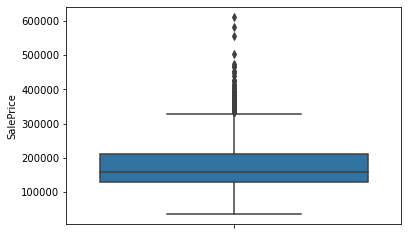

In [2161]:
#outlier treatment for SalesPrice column
sns.boxplot(y=df['SalePrice'])
plt.show()

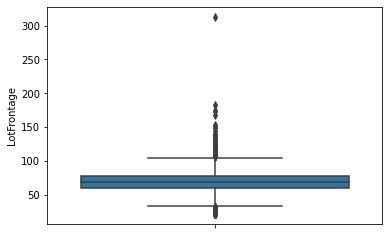

In [2162]:
#outlier treatment for LotFrontage column
sns.boxplot(y=df['LotFrontage'])
plt.show()

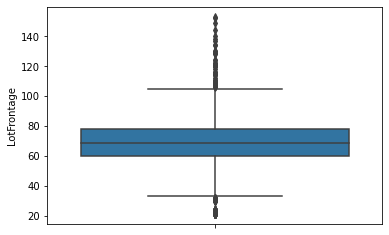

In [2163]:
q1 = df['LotFrontage'].quantile(0.1)
q3 = df['LotFrontage'].quantile(0.9)
IQR = q3 - q1
df = df[(df['LotFrontage'] >= q1 - 1.5*IQR) & (df['LotFrontage'] <= q3 + 1.5*IQR)]
sns.boxplot(y=df['LotFrontage'])
plt.show()

In [2164]:
#drop 'id' column
df.drop(['Id'], axis=1, inplace=True)

In [2165]:
#calculating age from YearBuilt and YrSold
df['age'] = df['YrSold'] - df['YearBuilt']

df.drop(['YearBuilt', 'YrSold'], axis=1, inplace=True)


In [2166]:
#descriptive analysis after outlier treatment
df.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice,age
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.00000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,56.879859,68.910954,9557.013428,6.063604,5.585866,92.591519,425.387986,44.751943,566.480565,1036.620495,1144.501060,338.657951,1488.912367,0.414134,0.055830,1.551237,0.379505,2.856537,1.047350,6.473498,0.589399,1.745583,466.75477,90.904594,46.017668,21.710954,3.518021,14.662898,6.332155,176812.058657,36.848763
std,42.137040,18.941337,3727.404466,1.353469,1.117976,151.705514,421.358475,157.725977,438.063881,395.587096,357.010376,425.369672,481.624845,0.512446,0.235753,0.539812,0.502614,0.812681,0.222223,1.593559,0.629565,0.742911,210.27685,120.593605,65.343584,59.541047,29.773773,55.146688,2.698405,72504.641258,30.379887
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
50%,50.000000,69.000000,9353.000000,6.000000,5.000000,0.000000,371.000000,0.000000,483.000000,980.000000,1077.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,474.00000,0.000000,24.000000,0.000000,0.000000,0.000000,6.000000,160000.000000,35.000000
75%,70.000000,78.000000,11344.500000,7.000000,6.000000,157.000000,697.000000,0.000000,807.000000,1268.500000,1368.000000,720.000000,1752.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.00000,168.000000,66.000000,0.000000,0.000000,0.000000,8.000000,208900.000000,55.000000
90%,120.000000,90.000000,13850.800000,8.000000,7.000000,309.600000,1024.000000,101.400000,1227.200000,1578.000000,1656.000000,926.800000,2112.600000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,3.000000,746.00000,253.000000,130.000000,112.000000,0.000000,0.000000,10.000000,273200.000000,84.000000
95%,160.000000,100.000000,16056.900000,8.000000,8.000000,423.300000,1237.300000,383.300000,1452.700000,1726.600000,1787.300000,1117.200000,2383.600000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,3.000000,840.00000,324.000000,172.000000,177.900000,0.000000,154.300000,11.000000,319270.000000,91.000000
99%,190.000000,124.000000,21750.000000,9.000000,9.000000,650.860000,1508.380000,818.520000,1773.160000,2045.440000,2116.440000,1348.720000,2827.160000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,966.04000,475.720000,280.880000,253.720000,168.000000,270.300000,12.000000,412150.000000,110.860000
max,190.000000,153.000000,26178.000000,10.000000,9.000000,816.000000,2188.000000,1474.000000,2153.000000,2633.000000,2898.000000,1818.000000,3608.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.00000,736.000000,547.000000,386.000000,508.000000,480.000000,12.000000,611657.000000,136.000000


In [2167]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SaleType,SaleCondition,SalePrice,age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,0,0,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,0,0,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,272,0,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,0,0,0,12,WD,Normal,250000,8


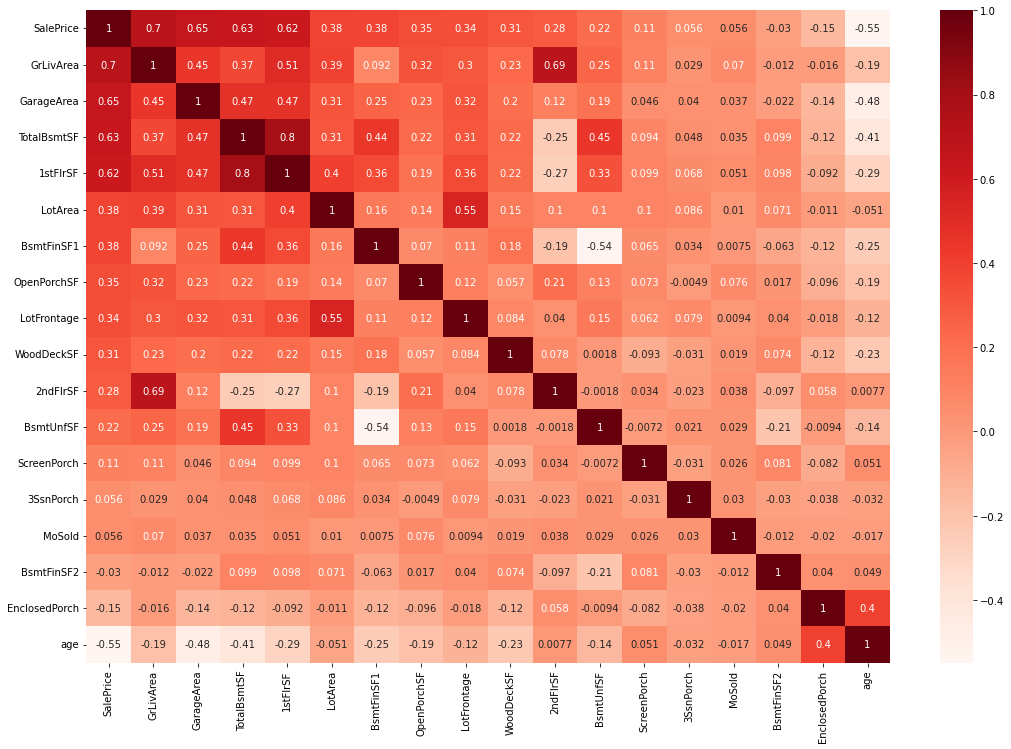

In [2168]:
#segregate categorical and numerical columns
cat_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive', 'SaleType', 'SaleCondition']

for col in cat_columns:
    df[col] = df[col].astype('object')

num_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'SalePrice', 'age']

#heatmap for numerical features
plt.figure(figsize=[18,12])
corrmat = df.corr()
cols = corrmat.nlargest(len(num_columns), 'SalePrice')['SalePrice'].index
sns.heatmap(df[cols].corr(), annot=True, cmap='Reds')
plt.show()

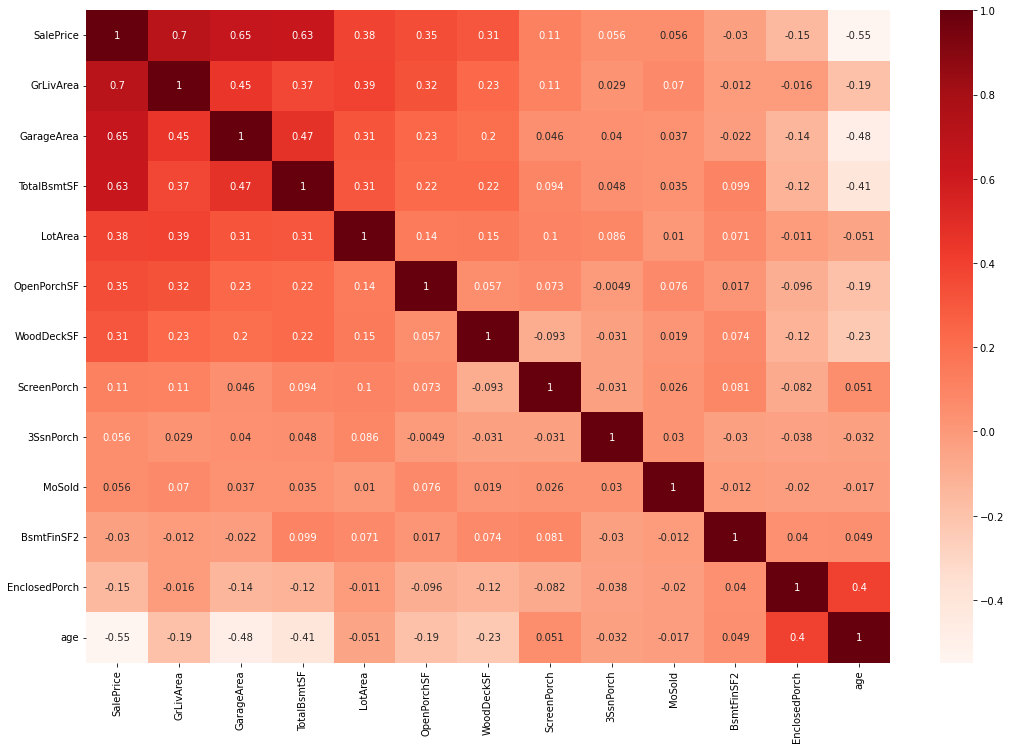

In [2169]:
#we can see that there is high correlation between few columns, hence we will drop them
df.drop(['1stFlrSF','2ndFlrSF','BsmtUnfSF','BsmtFinSF1', 'LotFrontage'], axis=1, inplace=True)

#heatmap for numerical features
plt.figure(figsize=[18,12])
corrmat = df.corr()
cols = corrmat.nlargest(len(num_columns), 'SalePrice')['SalePrice'].index
sns.heatmap(df[cols].corr(), annot=True, cmap='Reds')
plt.show()

In [2170]:
for i in cat_columns:
    print('Value Distribution for ', i, ' column')
    print(df[i].value_counts(normalize=True))
    print('\n'+'*-'*50+'\n')

Value Distribution for  MSSubClass  column
20     0.366078
60     0.198587
50     0.100353
120    0.061484
30     0.048763
160    0.043110
70     0.042403
80     0.040283
90     0.036749
190    0.019081
85     0.014134
75     0.010601
45     0.008481
180    0.007067
40     0.002827
Name: MSSubClass, dtype: float64

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Value Distribution for  MSZoning  column
RL         0.783746
RM         0.154064
FV         0.043816
RH         0.011307
C (all)    0.007067
Name: MSZoning, dtype: float64

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Value Distribution for  Street  column
Pave    0.997173
Grvl    0.002827
Name: Street, dtype: float64

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Value Distribution for  LotShape  column
Reg    0.646643
IR1    0.327915
IR2    0.021201
IR3    0.004

In [2171]:
#dropping few columns because of skewed distribution of values
df.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'Heating', 'CentralAir', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'PavedDrive', 'SaleType'], axis=1, inplace=True)

In [2172]:
#club values with less percentage into Others category
df['LotShape'] = df['LotShape'].replace(['IR2', 'IR3'],'Others')

df['LotConfig'] = df['LotConfig'].replace(['CulDSac', 'FR2', 'FR3'], 'Others')

df['Neighborhood'] = df['Neighborhood'].replace(['IDOTRR', 'Timber', 'NoRidge', 'SWISU', 'StoneBr', 'ClearCr', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'], 'Others')

df['HouseStyle'] = df['HouseStyle'].replace(['1.5Unf', '2.5Unf', '2.5Fin', 'SLvl', 'SFoyer'], 'Others')

df['OverallQual'] = df['OverallQual'].replace(['9', '3', '10', '2', '1'], 'Others')

df['OverallCond'] = df['OverallCond'].replace(['9', '3', '4', '2', '1'], 'Others')

df.RoofStyle = df.RoofStyle.replace(['Gambrel', 'Flat', 'Mansard', 'Shed'], 'Others')

df.Exterior1st = df.Exterior1st.replace(['CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock'], 'Others')

df.Exterior2nd = df.Exterior2nd.replace(['Wd Shng', 'Plywood', 'CmentBd', 'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'CBlock'], 'Other')

df.Foundation = df.Foundation.replace(['Slab', 'Stone', 'Wood'], 'Others')

df.BsmtQual = df.BsmtQual.replace(['Ex', 'NA', 'Fa'], 'Others')

df.BedroomAbvGr = df.BedroomAbvGr.replace(['1', '5', '6', '0', '8'], 'Others')

df.TotRmsAbvGrd = df.TotRmsAbvGrd.replace(['9', '10', '3', '11', '12', '2', '14'], 'Others')

df.SaleCondition = df.SaleCondition.replace(['Family', 'Alloca', 'AdjLand'], 'Others')


In [2173]:
#select dataframe for categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,SaleCondition
0,60,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,Ex,1,2,1,Gd,0,Attchd,RFn,2,Normal
1,20,RL,Reg,Others,Others,1Story,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,TA,1,Attchd,RFn,2,Normal
2,60,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,Ex,1,2,1,Gd,1,Attchd,RFn,2,Normal
3,70,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,Gd,1,Detchd,Unf,3,Abnorml
4,60,RL,IR1,Others,Others,2Story,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,Ex,1,2,1,Gd,1,Attchd,RFn,3,Normal


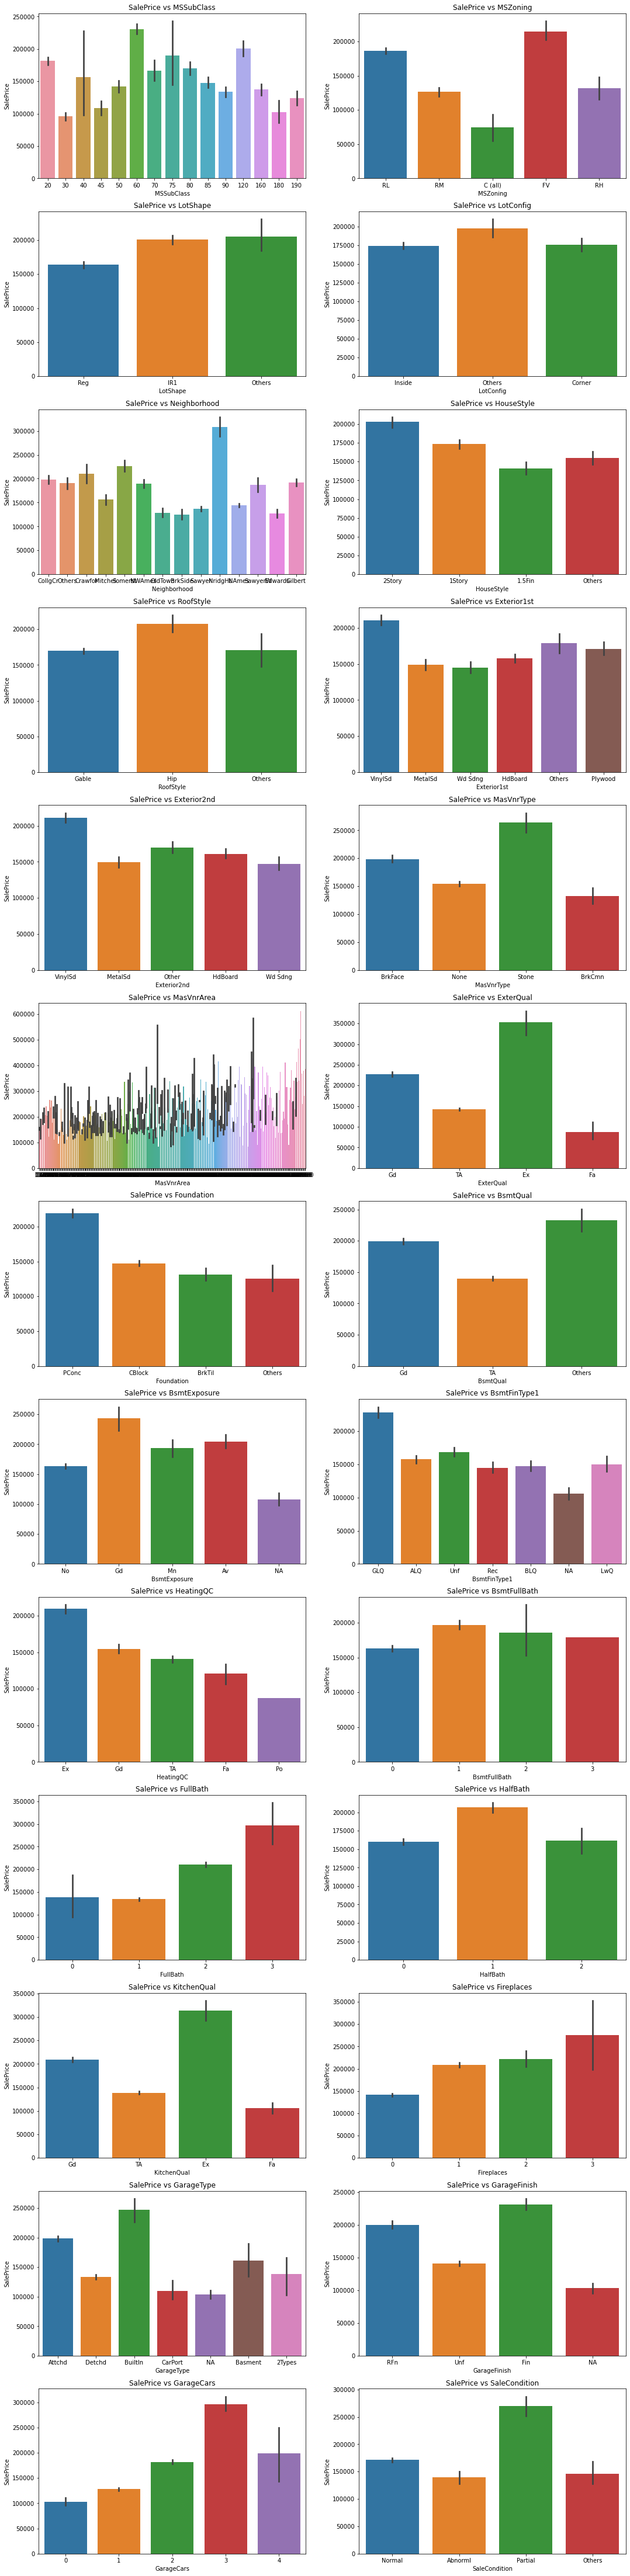

In [2174]:
plt.figure(figsize=[18, 80])
for i, j in enumerate(df_categorical.columns):
    plt.subplot(13, 2, i+1)
    sns.barplot(data=df, x=j, y='SalePrice')
    plt.title('SalePrice vs ' + j)

plt.show()
    

From the above graphs, we can see that house prices are low for below conditions - 
- MSSubClass - 30, 45, 180
- MSZoning - 'C (all)'
- LotShape is Reg
- some neighborhood areas
- HouseStyle is '1.5Fin'
- GarageCars are 0
- Exterior1st is MetalSd, Wd Sdng, HdBoard
- Exterior2nd is MetalSd, HdBoard, Wd Sdng
- ManVnrType - None and BrkCmn
- ExterQual is TA and Fa
- BsmtQual is TA
- Foundation is not PConc
- BsmtExposure is No or NA
- BsmtFinType1 is not GLQ
- HeatingQC is not Ex
- BsmtFullBath, HalfBath is 0
- FullBath is 0 or 1
- Fireplaces are 0
- KitchenQual is TA or Fa
- GarageFinish is NA
- GarageType is CarPort or NA
- GarageCars are 0

In [2175]:
num_columns = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns
num_columns = num_columns.drop('SalePrice')
num_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold',
       'age'],
      dtype='object')

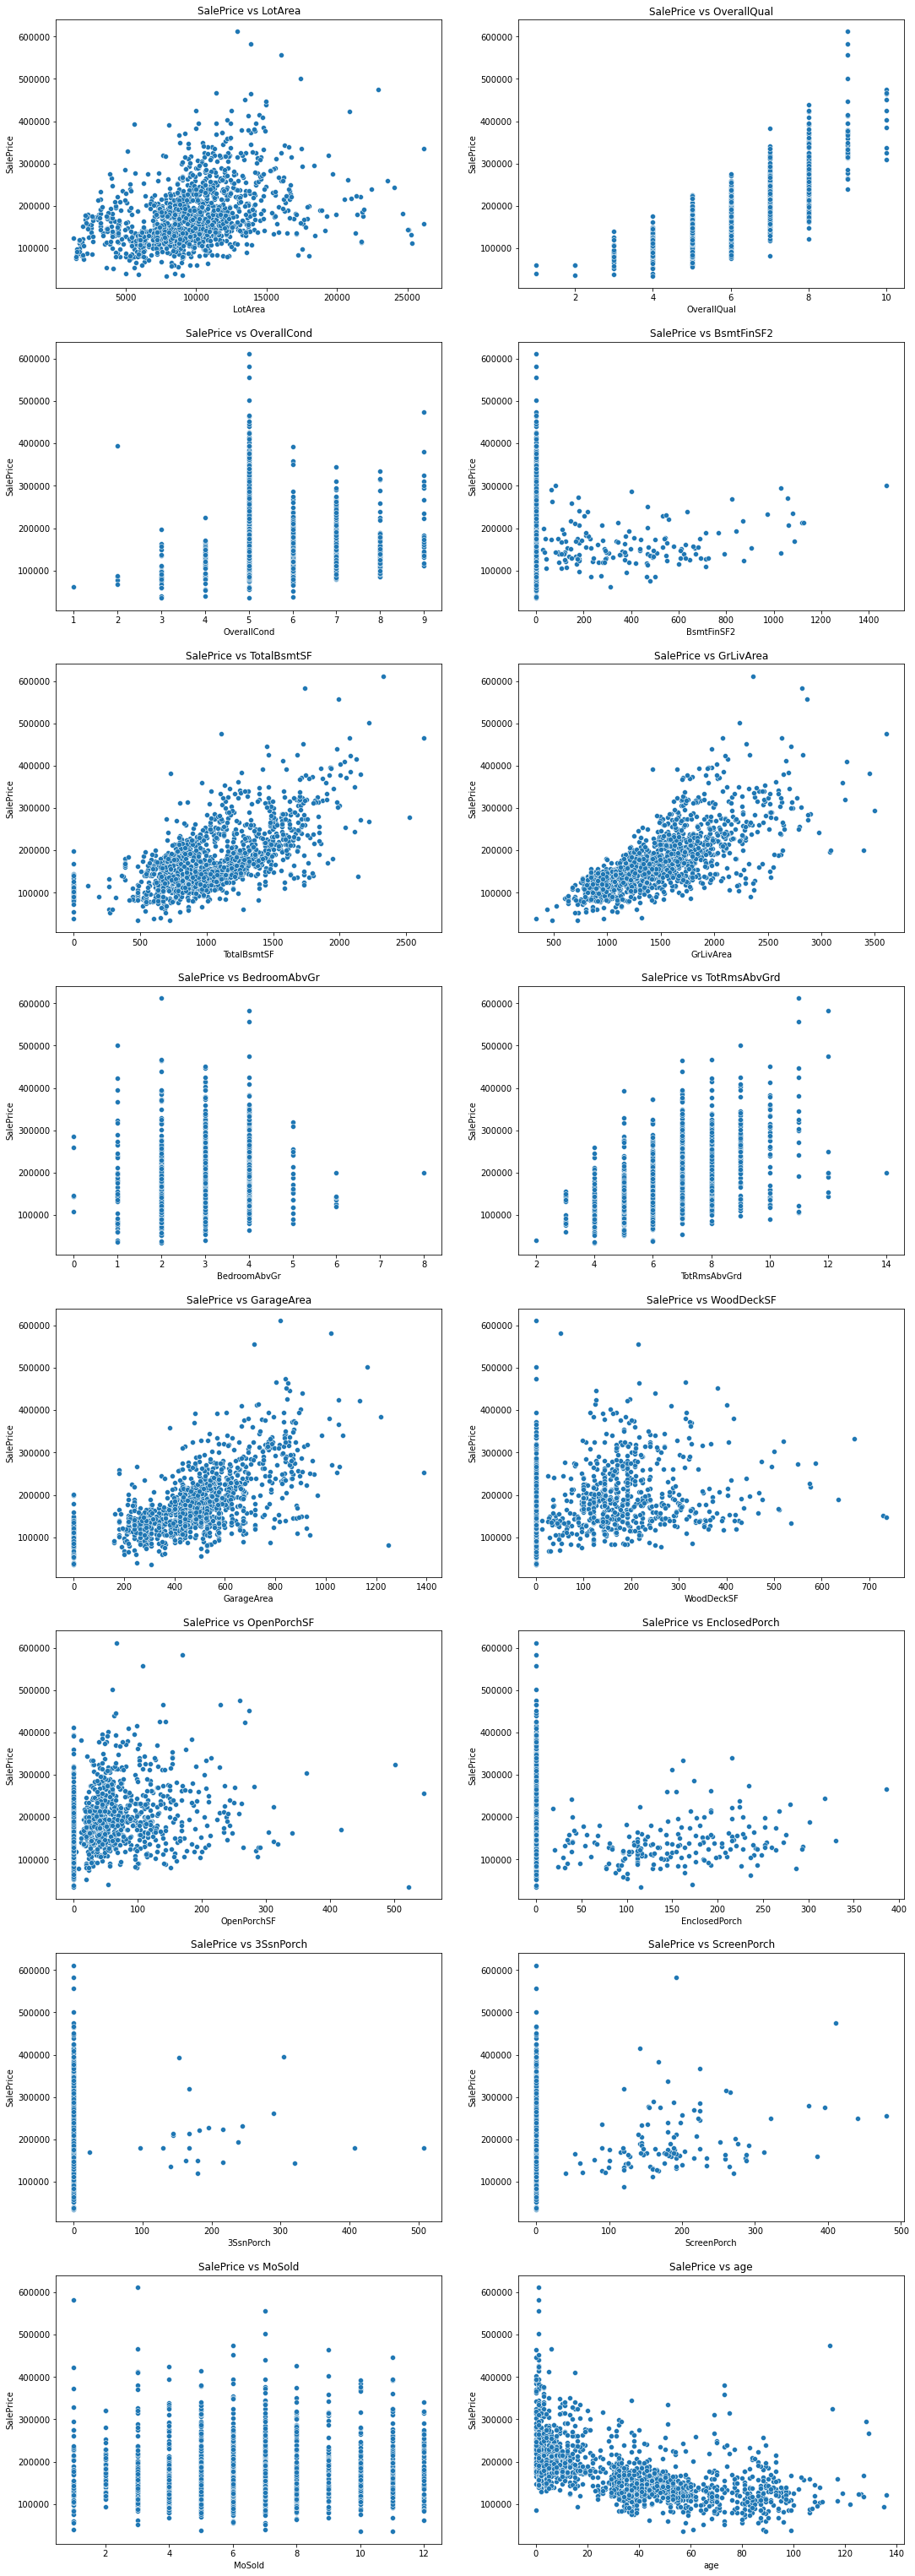

In [2176]:
#Bivariate analysis between independant and target variable
plt.figure(figsize=[18, 55])
for i, j in enumerate(num_columns):
    plt.subplot(8, 2, i+1)
    sns.scatterplot(data=df, x=j, y='SalePrice')
    plt.title('SalePrice vs ' + j)

plt.show()

From the above graph, we can see that house prices are low for below conditions - 
- LotArea is less
- OverallQual is less
- GrLivArea is less
- TotalBsmtSF is less
- more aged houses

In [2177]:
#create dummy variables for categorical features
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnrArea_132.0,MasVnrArea_135.0,MasVnrArea_136.0,MasVnrArea_137.0,MasVnrArea_138.0,MasVnrArea_140.0,MasVnrArea_142.0,MasVnrArea_143.0,MasVnrArea_144.0,MasVnrArea_145.0,MasVnrArea_146.0,MasVnrArea_147.0,MasVnrArea_148.0,MasVnrArea_149.0,MasVnrArea_150.0,MasVnrArea_151.0,MasVnrArea_153.0,MasVnrArea_154.0,MasVnrArea_156.0,MasVnrArea_157.0,MasVnrArea_158.0,MasVnrArea_160.0,MasVnrArea_161.0,MasVnrArea_162.0,MasVnrArea_163.0,MasVnrArea_164.0,MasVnrArea_165.0,MasVnrArea_166.0,MasVnrArea_167.0,MasVnrArea_168.0,MasVnrArea_169.0,MasVnrArea_170.0,MasVnrArea_171.0,MasVnrArea_172.0,MasVnrArea_174.0,MasVnrArea_175.0,MasVnrArea_176.0,MasVnrArea_178.0,MasVnrArea_180.0,MasVnrArea_182.0,MasVnrArea_183.0,MasVnrArea_184.0,MasVnrArea_186.0,MasVnrArea_188.0,MasVnrArea_189.0,MasVnrArea_192.0,MasVnrArea_194.0,MasVnrArea_196.0,MasVnrArea_200.0,MasVnrArea_202.0,MasVnrArea_203.0,MasVnrArea_204.0,MasVnrArea_205.0,MasVnrArea_206.0,MasVnrArea_207.0,MasVnrArea_208.0,MasVnrArea_209.0,MasVnrArea_210.0,MasVnrArea_212.0,MasVnrArea_215.0,MasVnrArea_216.0,MasVnrArea_218.0,MasVnrArea_219.0,MasVnrArea_220.0,MasVnrArea_223.0,MasVnrArea_224.0,MasVnrArea_225.0,MasVnrArea_226.0,MasVnrArea_228.0,MasVnrArea_230.0,MasVnrArea_232.0,MasVnrArea_233.0,MasVnrArea_234.0,MasVnrArea_236.0,MasVnrArea_237.0,MasVnrArea_238.0,MasVnrArea_240.0,MasVnrArea_243.0,MasVnrArea_244.0,MasVnrArea_245.0,MasVnrArea_246.0,MasVnrArea_247.0,MasVnrArea_248.0,MasVnrArea_250.0,MasVnrArea_252.0,MasVnrArea_254.0,MasVnrArea_255.0,MasVnrArea_256.0,MasVnrArea_258.0,MasVnrArea_259.0,MasVnrArea_260.0,MasVnrArea_261.0,MasVnrArea_262.0,MasVnrArea_263.0,MasVnrArea_266.0,MasVnrArea_268.0,MasVnrArea_270.0,MasVnrArea_272.0,MasVnrArea_274.0,MasVnrArea_275.0,MasVnrArea_278.0,MasVnrArea_280.0,MasVnrArea_281.0,MasVnrArea_284.0,MasVnrArea_285.0,MasVnrArea_286.0,M

In [2178]:
df.drop(list(df_categorical.columns), axis=1, inplace=True)

df = pd.concat([df, df_dummies], axis=1)

df.shape

(1415, 427)

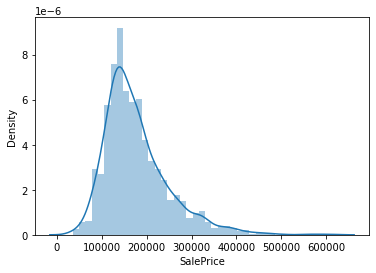

In [2179]:
#check distribution of SalePrice using distribution plot
sns.distplot(df['SalePrice'])
plt.show()

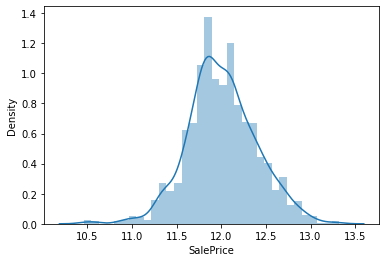

In [2180]:
#here, we will apply log transformation to normalize the distribution
df['SalePrice'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice'])
plt.show()

In [2181]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state=42)
df_train.shape, df_test.shape

((990, 427), (425, 427))

In [2182]:
num_columns = df_train.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns
num_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold',
       'SalePrice', 'age'],
      dtype='object')

In [2183]:
#scaling numerical variables
scaler = MinMaxScaler()
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_test[num_columns] = scaler.transform(df_test[num_columns])
df_train.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF2,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnrArea_132.0,MasVnrArea_135.0,MasVnrArea_136.0,MasVnrArea_137.0,MasVnrArea_138.0,MasVnrArea_140.0,MasVnrArea_142.0,MasVnrArea_143.0,MasVnrArea_144.0,MasVnrArea_145.0,MasVnrArea_146.0,MasVnrArea_147.0,MasVnrArea_148.0,MasVnrArea_149.0,MasVnrArea_150.0,MasVnrArea_151.0,MasVnrArea_153.0,MasVnrArea_154.0,MasVnrArea_156.0,MasVnrArea_157.0,MasVnrArea_158.0,MasVnrArea_160.0,MasVnrArea_161.0,MasVnrArea_162.0,MasVnrArea_163.0,MasVnrArea_164.0,MasVnrArea_165.0,MasVnrArea_166.0,MasVnrArea_167.0,MasVnrArea_168.0,MasVnrArea_169.0,MasVnrArea_170.0,MasVnrArea_171.0,MasVnrArea_172.0,MasVnrArea_174.0,MasVnrArea_175.0,MasVnrArea_176.0,MasVnrArea_178.0,MasVnrArea_180.0,MasVnrArea_182.0,MasVnrArea_183.0,MasVnrArea_184.0,MasVnrArea_186.0,MasVnrArea_188.0,MasVnrArea_189.0,MasVnrArea_192.0,MasVnrArea_194.0,MasVnrArea_196.0,MasVnrArea_200.0,MasVnrArea_202.0,MasVnrArea_203.0,MasVnrArea_204.0,MasVnrArea_205.0,MasVnrArea_206.0,MasVnrArea_207.0,MasVnrArea_208.0,MasVnrArea_209.0,MasVnrArea_210.0,MasVnrArea_212.0,MasVnrArea_215.0,MasVnrArea_216.0,MasVnrArea_218.0,MasVnrArea_219.0,MasVnrArea_220.0,MasVnrArea_223.0,MasVnrArea_224.0,MasVnrArea_225.0,MasVnrArea_226.0,MasVnrArea_228.0,MasVnrArea_230.0,MasVnrArea_232.0,MasVnrArea_233.0,MasVnrArea_234.0,MasVnrArea_236.0,MasVnrArea_237.0,MasVnrArea_238.0,MasVnrArea_240.0,MasVnrArea_243.0,MasVnrArea_244.0,MasVnrArea_245.0,MasVnrArea_246.0,MasVnrArea_247.0,MasVnrArea_248.0,MasVnrArea_250.0,MasVnrArea_252.0,MasVnrArea_254.0,MasVnrArea_255.0,MasVnrArea_256.0,MasVnrArea_258.0,MasVnrArea_259.0,MasVnrArea_260.0,MasVnrArea_261.0,MasVnrArea_262.0,MasVnrArea_263.0,MasVnrArea_266.0,MasVnr

In [2184]:
y_train = df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')
X_train = df_train
X_test = df_test

In [2185]:
#feature selection using RFE
lr = LinearRegression()

lr.fit(X_train, y_train)

rfe = RFE(lr, 100)

rfe = rfe.fit(X_train, y_train)

In [2186]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtFinSF2', False, 259),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 283),
 ('TotRmsAbvGrd', False, 276),
 ('GarageArea', False, 236),
 ('WoodDeckSF', False, 27),
 ('OpenPorchSF', False, 164),
 ('EnclosedPorch', False, 166),
 ('3SsnPorch', False, 255),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 280),
 ('age', True, 1),
 ('MSSubClass_30', False, 139),
 ('MSSubClass_40', False, 183),
 ('MSSubClass_45', False, 266),
 ('MSSubClass_50', False, 258),
 ('MSSubClass_60', False, 264),
 ('MSSubClass_70', False, 282),
 ('MSSubClass_75', False, 271),
 ('MSSubClass_80', False, 244),
 ('MSSubClass_85', False, 240),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 256),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 14),
 ('MSSubClass_190', False, 275),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotSha

In [2187]:
cols = X_train.columns[rfe.support_]

In [2188]:
X_train = X_train[cols]

lr.fit(X_train, y_train)

LinearRegression()

In [2189]:
df_train.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF2,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnrArea_132.0,MasVnrArea_135.0,MasVnrArea_136.0,MasVnrArea_137.0,MasVnrArea_138.0,MasVnrArea_140.0,MasVnrArea_142.0,MasVnrArea_143.0,MasVnrArea_144.0,MasVnrArea_145.0,MasVnrArea_146.0,MasVnrArea_147.0,MasVnrArea_148.0,MasVnrArea_149.0,MasVnrArea_150.0,MasVnrArea_151.0,MasVnrArea_153.0,MasVnrArea_154.0,MasVnrArea_156.0,MasVnrArea_157.0,MasVnrArea_158.0,MasVnrArea_160.0,MasVnrArea_161.0,MasVnrArea_162.0,MasVnrArea_163.0,MasVnrArea_164.0,MasVnrArea_165.0,MasVnrArea_166.0,MasVnrArea_167.0,MasVnrArea_168.0,MasVnrArea_169.0,MasVnrArea_170.0,MasVnrArea_171.0,MasVnrArea_172.0,MasVnrArea_174.0,MasVnrArea_175.0,MasVnrArea_176.0,MasVnrArea_178.0,MasVnrArea_180.0,MasVnrArea_182.0,MasVnrArea_183.0,MasVnrArea_184.0,MasVnrArea_186.0,MasVnrArea_188.0,MasVnrArea_189.0,MasVnrArea_192.0,MasVnrArea_194.0,MasVnrArea_196.0,MasVnrArea_200.0,MasVnrArea_202.0,MasVnrArea_203.0,MasVnrArea_204.0,MasVnrArea_205.0,MasVnrArea_206.0,MasVnrArea_207.0,MasVnrArea_208.0,MasVnrArea_209.0,MasVnrArea_210.0,MasVnrArea_212.0,MasVnrArea_215.0,MasVnrArea_216.0,MasVnrArea_218.0,MasVnrArea_219.0,MasVnrArea_220.0,MasVnrArea_223.0,MasVnrArea_224.0,MasVnrArea_225.0,MasVnrArea_226.0,MasVnrArea_228.0,MasVnrArea_230.0,MasVnrArea_232.0,MasVnrArea_233.0,MasVnrArea_234.0,MasVnrArea_236.0,MasVnrArea_237.0,MasVnrArea_238.0,MasVnrArea_240.0,MasVnrArea_243.0,MasVnrArea_244.0,MasVnrArea_245.0,MasVnrArea_246.0,MasVnrArea_247.0,MasVnrArea_248.0,MasVnrArea_250.0,MasVnrArea_252.0,MasVnrArea_254.0,MasVnrArea_255.0,MasVnrArea_256.0,MasVnrArea_258.0,MasVnrArea_259.0,MasVnrArea_260.0,MasVnrArea_261.0,MasVnrArea_262.0,MasVnrArea_263.0,MasVnrArea_266.0,MasVnrArea_268.0

In [2190]:
#linear regression coefficient and intercept values
print(lr.intercept_)
print(lr.coef_)

-176913657716.47345
[ 5.52519855e-02  1.92353673e-01  1.49289933e-01  1.30568060e-01
  3.52748618e-01  2.83913737e-02 -1.63927323e-01 -3.08612555e-02
 -3.45438424e-02  1.35927539e-01  9.71221364e-02  1.12564892e-01
  9.02234035e-02  5.23786293e-02  2.83738567e-02 -4.40710164e+10
 -1.71050810e+10  2.91829225e+09 -2.85674898e-02 -9.19204359e+08
 -4.62122450e-02  6.42695889e+09 -6.36769128e-02 -9.94505746e-02
  1.10136919e+08 -2.73374150e+09  4.15949756e+08 -4.70112666e-02
 -1.09109422e+08  2.90902943e+07 -8.71787980e+07 -3.21914205e-02
  6.22923595e+06 -4.03260984e+06 -2.20193504e+05 -1.81087874e+05
 -4.17513736e-02 -1.85521467e-01 -3.85347126e-02 -3.18034390e-02
 -3.21924613e-02 -3.70158046e-02 -3.36697573e-02 -5.59697702e-02
 -4.93297101e-02 -6.78847892e-02 -4.65540030e-02 -6.98888678e-02
 -3.34181910e-02 -7.06532308e-02 -1.06128321e-01 -6.34048667e-02
 -4.43351459e-02 -2.77967949e-01 -4.73652861e-02 -3.86114097e-02
 -6.00228750e-02 -4.19523013e-02 -3.94407651e-02  7.38989806e-02
 -7.9

In [2191]:
#Display metrics for linear regression model
X_test = X_test[cols]

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

metric_linear = []

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
metric_linear.append(rss_train)
metric_linear.append(rss_test)
print('Train RSS', rss_train)
print('Test RSS', rss_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
metric_linear.append(mse_train)
metric_linear.append(mse_test)
print('Train MSE', mse_train)
print('Test MSE', mse_test)

rmse_train = mse_train * 0.5
rmse_test = mse_test * 0.5
metric_linear.append(rmse_train)
metric_linear.append(rmse_test)
print('Train RMSE', rmse_train)
print('Test RMSE', rmse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
metric_linear.append(r2_train)
metric_linear.append(r2_test)
print('Train R2 score', r2_train)
print('Test R2 score', r2_test)

Train RSS 1.385844208271664
Test RSS 2.334490140193361e+21
Train MSE 0.0013998426346178423
Test MSE 5.492917976925556e+18
Train RMSE 0.0006999213173089212
Test RMSE 2.746458988462778e+18
Train R2 score 0.9263944829403217
Test R2 score -2.9635910869913685e+20


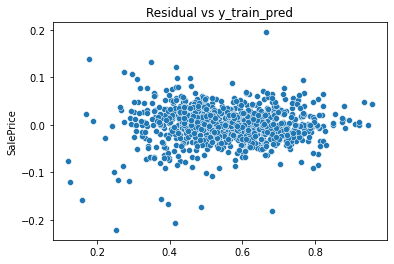

In [2192]:
res = y_train - y_train_pred
sns.scatterplot(y_train_pred, res)
plt.title('Residual vs y_train_pred')
plt.show()

From the above graph, we can see that residual don't have constant variance, hence assumptions of linear regression are not satisfied

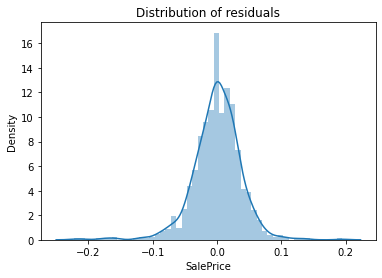

In [2193]:
sns.distplot(res)
plt.title('Distribution of residuals')
plt.show()

### Ridge Regression

In [2194]:
#finding out best alpha for Ridge Regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2195]:
model_cv.best_params_

{'alpha': 0.8}

In [2196]:
#fitting Ridge Regression model for alpha=0.8
alpha = 0.8

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

print(ridge.coef_)

[ 0.05679032  0.19565988  0.13726113  0.1229441   0.32475136  0.03220655
 -0.15018268 -0.02940989 -0.03422953  0.10751333  0.06693914  0.08441294
  0.0613405   0.05110693  0.02622267  0.          0.          0.
 -0.01200281  0.         -0.02986432  0.         -0.0364547  -0.05002281
  0.          0.          0.         -0.0275638   0.          0.
  0.         -0.02222684  0.          0.          0.          0.
 -0.0323173  -0.08687259 -0.02042688 -0.01314557 -0.01468181 -0.01890537
 -0.02166811 -0.03909417 -0.02347623 -0.03929652 -0.02772961 -0.03659492
 -0.02361665 -0.04474314 -0.05302132 -0.04504559 -0.03034989 -0.15328581
 -0.02202477 -0.0200763  -0.03089555 -0.02939722 -0.0259601   0.04145108
 -0.04002905 -0.03679049 -0.01499287 -0.01421961 -0.08074211 -0.07342008
 -0.01261516 -0.01734762 -0.03853809 -0.02449841 -0.01319495 -0.01518369
 -0.01415087 -0.03517102 -0.02819263 -0.1157619  -0.02164963 -0.04551871
 -0.02798311 -0.02326981 -0.01307459  0.03855174 -0.01794451  0.03179734
 -

In [2197]:
#Display metrics for ridge regression model
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric_ridge = []

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
metric_ridge.append(rss_train)
metric_ridge.append(rss_test)
print('Train RSS', rss_train)
print('Test RSS', rss_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
metric_ridge.append(mse_train)
metric_ridge.append(mse_test)
print('Train MSE', mse_train)
print('Test MSE', mse_test)

rmse_train = mse_train * 0.5
rmse_test = mse_test * 0.5
metric_ridge.append(rss_train)
metric_ridge.append(rss_test)
print('Train RMSE', rmse_train)
print('Test RMSE', rmse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
metric_ridge.append(r2_train)
metric_ridge.append(r2_test)
print('Train R2 score', r2_train)
print('Test R2 score', r2_test)

Train RSS 1.472608845896469
Test RSS 0.8396781836221022
Train MSE 0.001487483682723706
Test MSE 0.001975713373228476
Train RMSE 0.000743741841361853
Test RMSE 0.000987856686614238
Train R2 score 0.9217862044796179
Test R2 score 0.8934044424485147


In [2198]:
#creating the dataframe for the coefficients obtained from Ridge

df_ridge = pd.DataFrame(list(zip(X_train.columns, abs(ridge.coef_))))

df_ridge.columns = ['Feature', 'Coefficient']

df_ridge['Coefficient'] = df_ridge['Coefficient'].apply(lambda x: round(x, 3))

df_ridge.sort_values(['Coefficient'], ascending=False)

,Feature,Coefficient
4,GrLivArea,0.325
1,OverallQual,0.196
53,MasVnrArea_209.0,0.153
6,age,0.150
2,OverallCond,0.137
3,TotalBsmtSF,0.123
75,MasVnrArea_428.0,0.116
9,MSZoning_FV,0.108
37,MasVnrArea_113.0,0.087
11,MSZoning_RL,0.084


### Lasso Regression

In [2199]:
#finding out best alpha for lasso regression model
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2200]:
model_cv.best_params_

{'alpha': 0.0001}

In [2201]:
#fitting Lasso Regression model for alpha=0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [2202]:
lasso.coef_

array([ 5.07730384e-02,  2.07837080e-01,  1.40336092e-01,  1.20483097e-01,
        3.34776551e-01,  2.78232618e-02, -1.56542648e-01, -2.75255808e-02,
       -3.64512950e-02,  8.80165916e-02,  4.15088267e-02,  6.54143005e-02,
        4.22957783e-02,  4.73815091e-02,  2.15645251e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.44843679e-03, -5.83102591e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.46244039e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -8.56208065e-03, -0.00000000e+00, -1.11601798e-02,
       -0.00000000e+00, -

In [2203]:
#Display metrics for lasso regression model
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric_lasso = []

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
metric_lasso.append(rss_train)
metric_lasso.append(rss_test)
print('Train RSS', rss_train)
print('Test RSS', rss_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
metric_lasso.append(mse_train)
metric_lasso.append(mse_test)
print('Train MSE', mse_train)
print('Test MSE', mse_test)

rmse_train = mse_train * 0.5
rmse_test = mse_test * 0.5
metric_lasso.append(rmse_train)
metric_lasso.append(rmse_test)
print('Train RMSE', rmse_train)
print('Test RMSE', rmse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
metric_lasso.append(r2_train)
metric_lasso.append(r2_test)
print('Train R2 score', r2_train)
print('Test R2 score', r2_test)

Train RSS 1.472608845896469
Test RSS 0.8396781836221022
Train MSE 0.001487483682723706
Test MSE 0.001975713373228476
Train RMSE 0.000743741841361853
Test RMSE 0.000987856686614238
Train R2 score 0.9217862044796179
Test R2 score 0.8934044424485147


In [2204]:
#creating the dataframe for the coefficients obtained from Lasso

df_lasso = pd.DataFrame(list(zip(X_train.columns, abs(lasso.coef_))))

df_lasso.columns = ['Feature', 'Coefficient']

df_lasso['Coefficient'] = df_lasso['Coefficient'].apply(lambda x: round(x, 3))

df_lasso.sort_values(['Coefficient'], ascending=False)

,Feature,Coefficient
4,GrLivArea,0.335
1,OverallQual,0.208
53,MasVnrArea_209.0,0.176
6,age,0.157
2,OverallCond,0.140
3,TotalBsmtSF,0.120
75,MasVnrArea_428.0,0.111
9,MSZoning_FV,0.088
11,MSZoning_RL,0.065
37,MasVnrArea_113.0,0.058


In [2205]:
#comparison of metrics between Linear, Ridge and Lasso Regression
metric = {'Metric':['Train RSS', 'Train RSS', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train R2 score', 'Test R2 score'],
          'Linear Regression': metric_linear,
          'Ridge Regression': metric_ridge,
          'Lasso Regression': metric_lasso
         }

metric_df = pd.DataFrame(metric)

metric_df.head(10)

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,Train RSS,1.385844e+00,1.472609,1.472609
1,Train RSS,2.334490e+21,0.839678,0.839678
2,Train MSE,1.399843e-03,0.001487,0.001487
3,Test MSE,5.492918e+18,0.001976,0.001976
4,Train RMSE,6.999213e-04,1.472609,0.000744
5,Test RMSE,2.746459e+18,0.839678,0.000988
6,Train R2 score,9.263945e-01,0.921786,0.921786
7,Test R2 score,-2.963591e+20,0.893404,0.893404


### Conclusion 

Suprise Housing should keep a check on those predictors which affects house price.

Below top 5 predictors are linked with house price
- GrLivArea
- OverallQual
- MasVnrArea_209.0
- age
- OverallCond

### Code for subjective question no: 1

In [2206]:
#fitting Ridge Regression model for alpha=0.8*2
alpha = 1.6

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

print(ridge.coef_)

[ 0.05844198  0.19505764  0.12864868  0.11951045  0.30492978  0.03331076
 -0.13983315 -0.02760744 -0.03275577  0.09170203  0.05122019  0.06928163
  0.04567079  0.0506708   0.02540929  0.          0.          0.
 -0.00661008  0.         -0.02200116  0.         -0.02598951 -0.03289686
  0.          0.          0.         -0.01990401  0.          0.
  0.         -0.01690635  0.          0.          0.          0.
 -0.02719748 -0.05549152 -0.01393473 -0.00708439 -0.00939927 -0.01236069
 -0.01573297 -0.03034568 -0.01443943 -0.02836722 -0.01916019 -0.02473383
 -0.01832621 -0.03233326 -0.03483752 -0.03542081 -0.02304994 -0.10587864
 -0.01378407 -0.01341781 -0.02060017 -0.02294623 -0.01953963  0.02855001
 -0.02625301 -0.02917327 -0.01034752 -0.00869331 -0.05372759 -0.05066764
 -0.00710387 -0.01173537 -0.02485957 -0.0136362  -0.00803295 -0.00868079
 -0.00815885 -0.02410748 -0.01896478 -0.07998061 -0.01611401 -0.02979961
 -0.01820503 -0.01513599 -0.00634537  0.02830277 -0.01095223  0.03119032
 -

In [2207]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric_ridge = []

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
metric_ridge.append(rss_train)
metric_ridge.append(rss_test)
print('Train RSS', rss_train)
print('Test RSS', rss_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
metric_ridge.append(mse_train)
metric_ridge.append(mse_test)
print('Train MSE', mse_train)
print('Test MSE', mse_test)

rmse_train = mse_train * 0.5
rmse_test = mse_test * 0.5
metric_ridge.append(rss_train)
metric_ridge.append(rss_test)
print('Train RMSE', rmse_train)
print('Test RMSE', rmse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
metric_ridge.append(r2_train)
metric_ridge.append(r2_test)
print('Train R2 score', r2_train)
print('Test R2 score', r2_test)

Train RSS 1.5650611411900113
Test RSS 0.8450239660637966
Train MSE 0.00158086983958587
Test MSE 0.001988291684855992
Train RMSE 0.000790434919792935
Test RMSE 0.000994145842427996
Train R2 score 0.9168758408486857
Test R2 score 0.8927258054765937


In [2208]:
#creating the dataframe for the coefficients obtained from Ridge

df_ridge = pd.DataFrame(list(zip(X_train.columns, abs(ridge.coef_))))

df_ridge.columns = ['Feature', 'Coefficient']

df_ridge['Coefficient'] = df_ridge['Coefficient'].apply(lambda x: round(x, 3))

df_ridge.sort_values(['Coefficient'], ascending=False)

,Feature,Coefficient
4,GrLivArea,0.305
1,OverallQual,0.195
6,age,0.140
2,OverallCond,0.129
3,TotalBsmtSF,0.120
53,MasVnrArea_209.0,0.106
9,MSZoning_FV,0.092
75,MasVnrArea_428.0,0.080
11,MSZoning_RL,0.069
0,LotArea,0.058


In [2209]:
#fitting Lasso Regression model for alpha=0.0001*2

alpha = 0.0002

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [2210]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric_lasso = []

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
metric_lasso.append(rss_train)
metric_lasso.append(rss_test)
print('Train RSS', rss_train)
print('Test RSS', rss_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
metric_lasso.append(mse_train)
metric_lasso.append(mse_test)
print('Train MSE', mse_train)
print('Test MSE', mse_test)

rmse_train = mse_train * 0.5
rmse_test = mse_test * 0.5
metric_lasso.append(rmse_train)
metric_lasso.append(rmse_test)
print('Train RMSE', rmse_train)
print('Test RMSE', rmse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
metric_lasso.append(r2_train)
metric_lasso.append(r2_test)
print('Train R2 score', r2_train)
print('Test R2 score', r2_test)

Train RSS 1.5650611411900113
Test RSS 0.8450239660637966
Train MSE 0.00158086983958587
Test MSE 0.001988291684855992
Train RMSE 0.000790434919792935
Test RMSE 0.000994145842427996
Train R2 score 0.9168758408486857
Test R2 score 0.8927258054765937


In [2211]:
#creating the dataframe for the coefficients obtained from Lasso

df_lasso = pd.DataFrame(list(zip(X_train.columns, abs(lasso.coef_))))

df_lasso.columns = ['Feature', 'Coefficient']

df_lasso['Coefficient'] = df_lasso['Coefficient'].apply(lambda x: round(x, 3))

df_lasso.sort_values(['Coefficient'], ascending=False)

,Feature,Coefficient
4,GrLivArea,0.331
1,OverallQual,0.216
6,age,0.153
2,OverallCond,0.138
3,TotalBsmtSF,0.116
53,MasVnrArea_209.0,0.076
9,MSZoning_FV,0.047
0,LotArea,0.046
13,Neighborhood_Crawfor,0.045
94,GarageType_NA,0.043


### Code for subjective question no - 3

In [2212]:
#dropping top 5 features from data
X_train_new = X_train.drop(['GrLivArea', 'OverallQual', 'MasVnrArea_209.0', 'age', 'OverallCond'], axis=1)

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

model_cv.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.0001}

In [2213]:
#fitting Lasso Regression model for alpha=0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [2214]:
X_test_new = X_test.drop(['GrLivArea', 'OverallQual', 'MasVnrArea_209.0', 'age', 'OverallCond'], axis=1)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

metric_lasso = []

rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_test_pred))
metric_lasso.append(rss_train)
metric_lasso.append(rss_test)
print('Train RSS', rss_train)
print('Test RSS', rss_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
metric_lasso.append(mse_train)
metric_lasso.append(mse_test)
print('Train MSE', mse_train)
print('Test MSE', mse_test)

rmse_train = mse_train * 0.5
rmse_test = mse_test * 0.5
metric_lasso.append(rmse_train)
metric_lasso.append(rmse_test)
print('Train RMSE', rmse_train)
print('Test RMSE', rmse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
metric_lasso.append(r2_train)
metric_lasso.append(r2_test)
print('Train R2 score', r2_train)
print('Test R2 score', r2_test)

Train RSS 4.081640694089198
Test RSS 1.8789923842767888
Train MSE 0.0041228693879688865
Test MSE 0.004421158551239503
Train RMSE 0.0020614346939844433
Test RMSE 0.0022105792756197517
Train R2 score 0.7832142516835003
Test R2 score 0.7614654700530832


In [2215]:
#creating the dataframe for the coefficients obtained from Lasso

df_lasso = pd.DataFrame(list(zip(X_train_new.columns, abs(lasso.coef_))))

df_lasso.columns = ['Feature', 'Coefficient']

df_lasso['Coefficient'] = df_lasso['Coefficient'].apply(lambda x: round(x, 3))

df_lasso.sort_values(['Coefficient'], ascending=False)

,Feature,Coefficient
1,TotalBsmtSF,0.223
5,MSZoning_FV,0.189
6,MSZoning_RH,0.164
80,KitchenQual_Fa,0.144
7,MSZoning_RL,0.138
0,LotArea,0.133
8,MSZoning_RM,0.120
70,MasVnrArea_428.0,0.116
82,KitchenQual_TA,0.113
86,GarageType_BuiltIn,0.108
